# Instalar bibliotecas requeridas

a) criar ambiente virtual<br>
a) pip install -r 
https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/cont/requeriments_with_jupyter.txt
<br>
b) iniciar jupyter

# Verificar versões das bibliotecas instaladas

In [1]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy
import pandas
import sys
print('Jupyter: {}'.format(jupyter.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('Python: {}'.format(sys.version))

Jupyter: 1.0.0
sklearn: 0.24.0
scipy: 1.5.4
matplotlib: 3.3.3
numpy: 1.19.4
pandas: 1.1.5
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


# Carregar Bibliotecas

In [2]:
import pandas as pd
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot

# Carregar dataset e obter resumo dos dados


In [3]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, header=0, names=names)
# shape
print(dataset.shape)
# head
print(dataset.head())
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-vers

# Rápida análise gráfica

<AxesSubplot:>

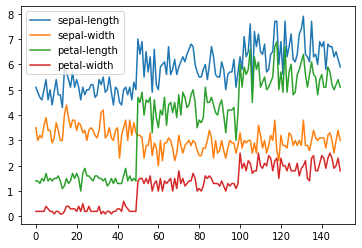

In [4]:
dataset.plot()

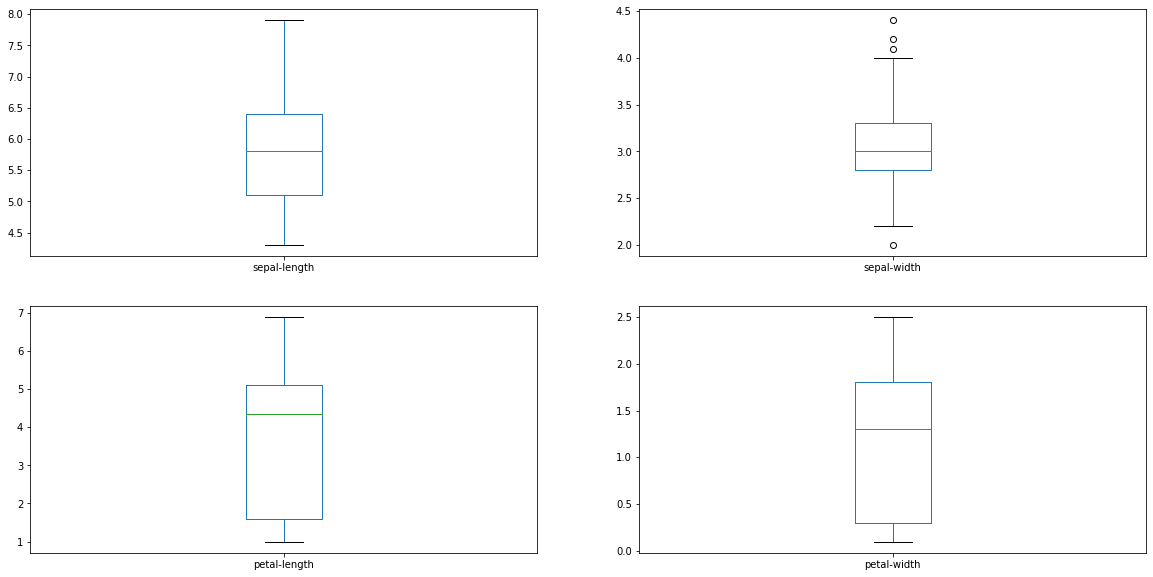

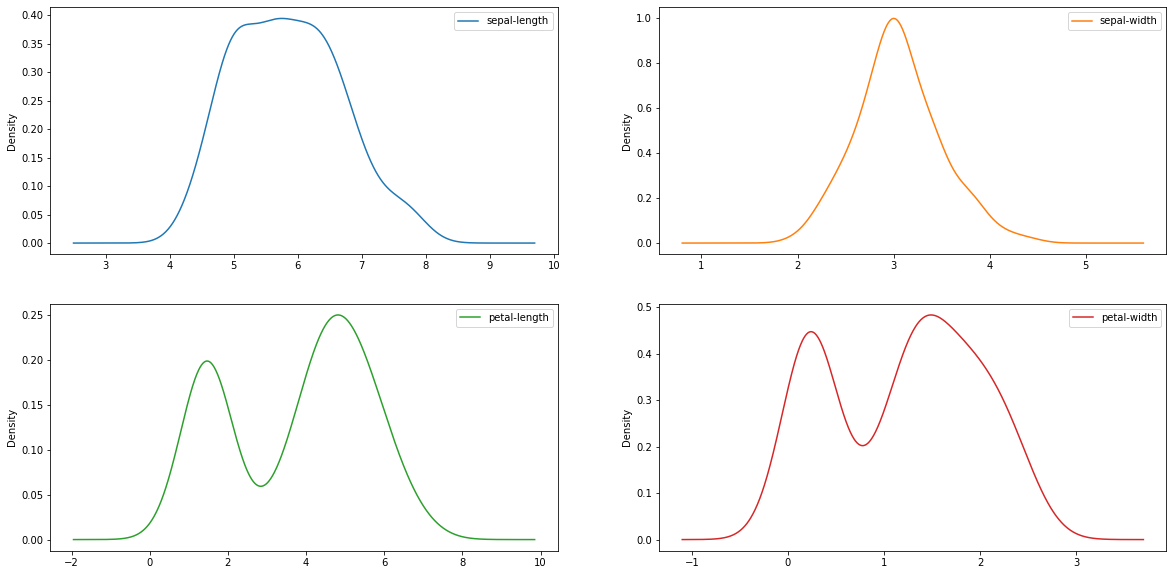

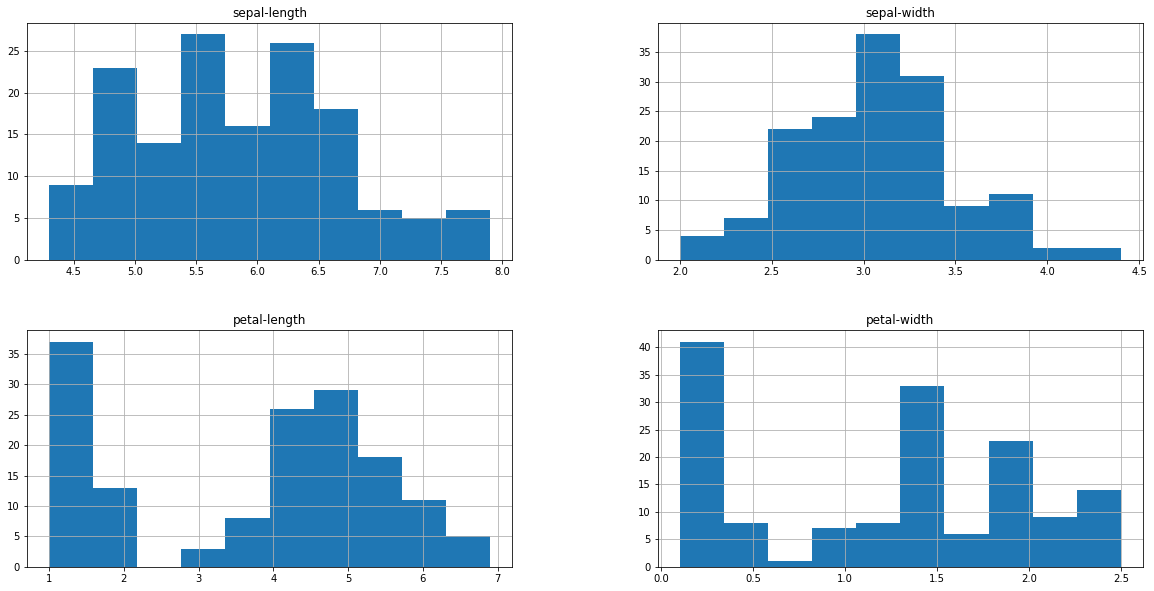

In [5]:
# box and plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(20,10))
pyplot.show()
dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(20,10))
pyplot.show()
# histograms
dataset.hist(figsize=(20,10))
pyplot.show()

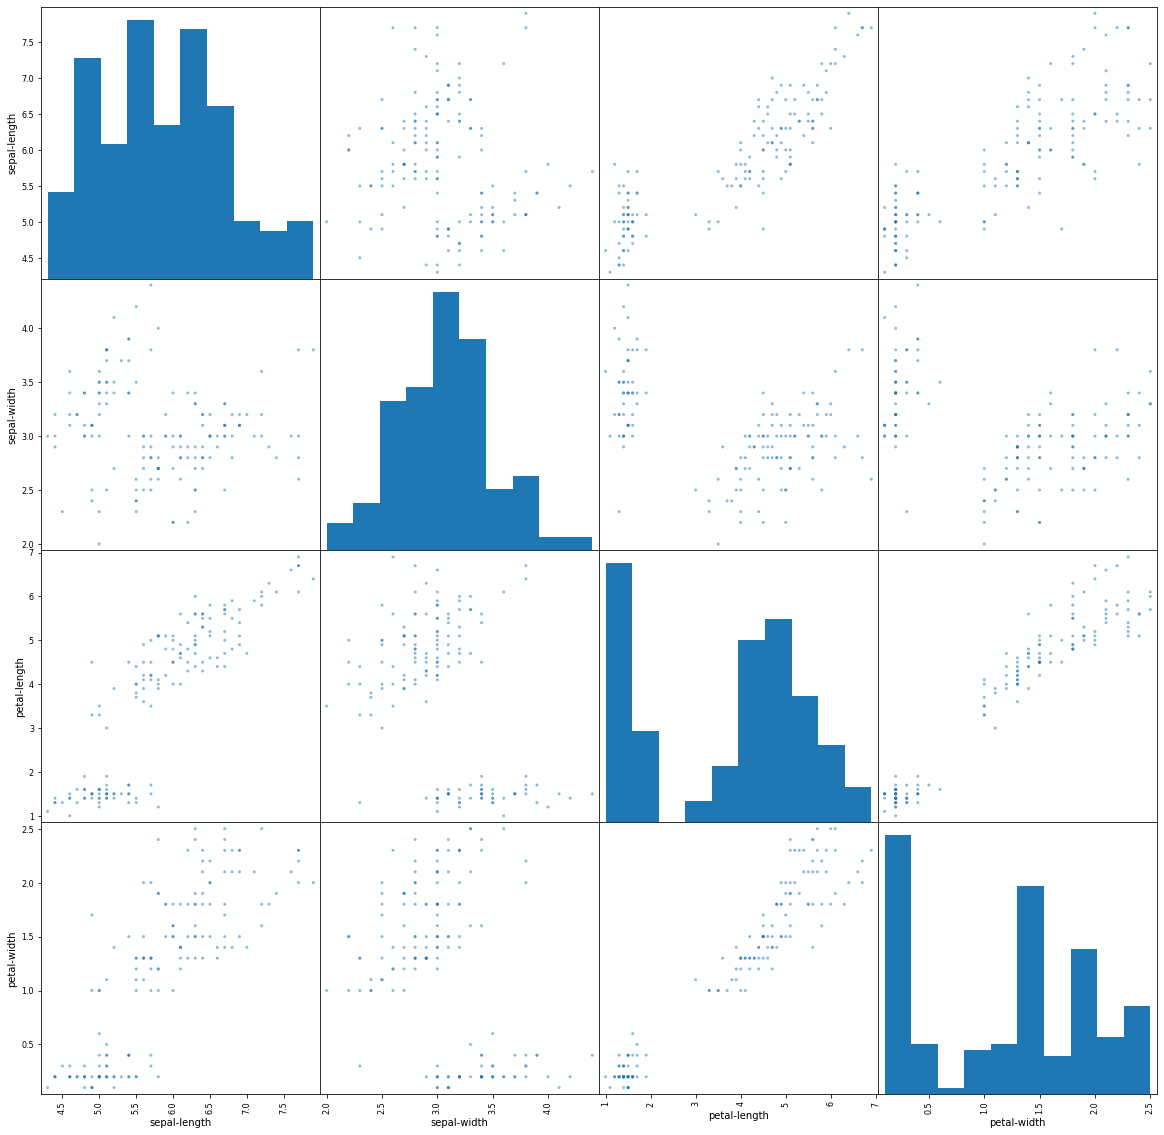

In [6]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset,figsize=(20,20))
pyplot.show()

# Separando conjunto de dados, aplicando modelos e comparando algoritmos

In [7]:
SVC()

SVC()

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


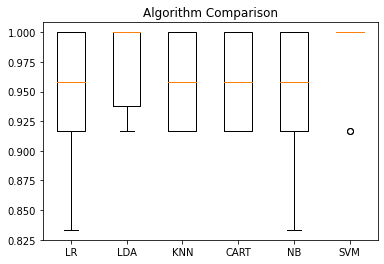

In [8]:
# Separando conjuntos de treinamento e teste
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, 
                                                                test_size=0.20, 
                                                                random_state=1, 
                                                                shuffle=True)
# definindo modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',degree=7,C=3)))
# Avaliar cada modelo
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Comparar Algoritmos
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()



# Fazendo predições e verificando resultados

In [9]:
# Fazendo predições 
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Avaliando predictions
print(sklearn.metrics.accuracy_score(Y_validation, predictions))
print(sklearn.metrics.confusion_matrix(Y_validation, predictions))
print(sklearn.metrics.classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

